# Линейная регрессия
### Давыдова Елизавета
#### Т12О-101М-20

In [74]:
from sklearn.datasets import load_boston
import numpy as np

boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])



# текстовое описание датасета
#print('\n',boston_dataset.DESCR)

Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


## Задание 1
Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python

Нужно написать код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$

Сравните по евклидовому расстоянию коэффициенты из класса LinearRegression и полученные аналитическим способом

In [75]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance

# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(features.shape[1])
ones = np.ones((features.shape[0], 1))
x_new = np.hstack((ones, features))

w_analytic = np.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y)
print(w_analytic.shape)




#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')

(14,)
Аналитически определённые коэффициенты [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


Проверка по евклидовой метрике

In [76]:

# обучаем модель "из коробки"
reg = LinearRegression().fit(x, y)
w_sklearn = np.append([reg.intercept_], reg.coef_)

try:
    linalg_norm = norm(w_sklearn - w_analytic)
    print(f"Коэффициенты, вычисленные моделью sklearn {w_sklearn}")
    print(f"Евклидово расстояние между наборами коэффициентов {linalg_norm}\n")
except:
    print("!ВАЖНО!: к матрице фичей X нужно добавить столбец, который состоит из единиц")
    print("Это т.н. 'тривиальный' признак $x_0=1$")

ValueError: Expected 2D array, got 1D array instead:
array=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Проверка на правильность

In [77]:
import unittest


class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(linalg_norm, 0.000000, places=6)

unittest.main(argv=[''], verbosity=2, exit=False)

test_task (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## Задание 2
Визуализируйте в виде "столбиков" коэффициенты "из коробки" (т.е. из sklearn) и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

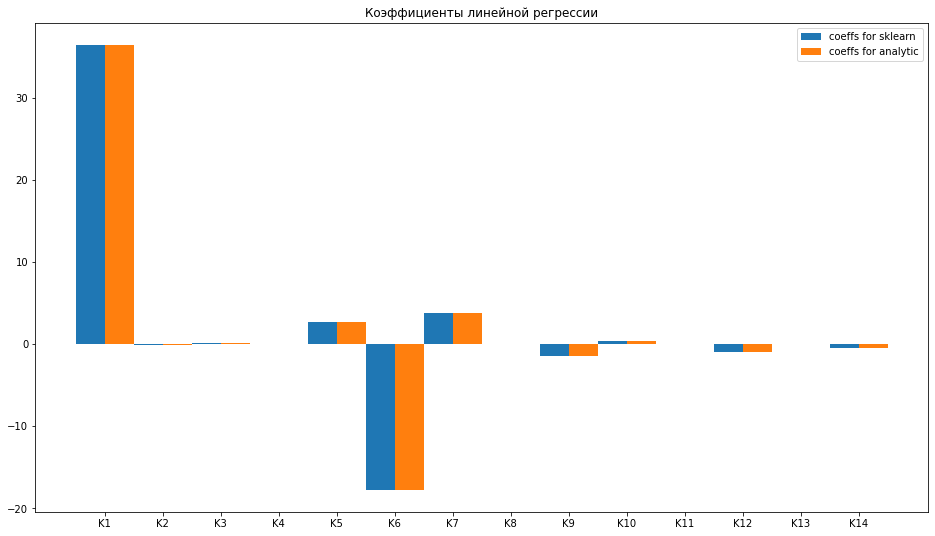

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
cat_par = [f"K{i}" for i in range(1, len(w_sklearn) + 1)]
x = np.arange(len(cat_par))
v1 = w_sklearn  
v2 = w_analytic
width = 0.5
fig, ax = plt.subplots(figsize=(16,9))
rects1 = ax.bar(x - width/2, v1, width, label='coeffs for sklearn')
rects2 = ax.bar(x + width/2, v2, width, label='coeffs for analytic')
ax.set_title('Коэффициенты линейной регрессии')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()


## Задание 3
Постройте предсказания двумя моделями
+ вашей моделью
+ моделью из библиотеки sklearn

Посчитайте, какую ошибку $(\hat{y}-y)$ даёт модели на каждом обучающем примере каждая из моделей и постройте две гистограммы на одном графике c наложением (одна должна "просвечивать" через другую)

Если вы всё сделали правильно, гистограммы ошибок должны совпасть

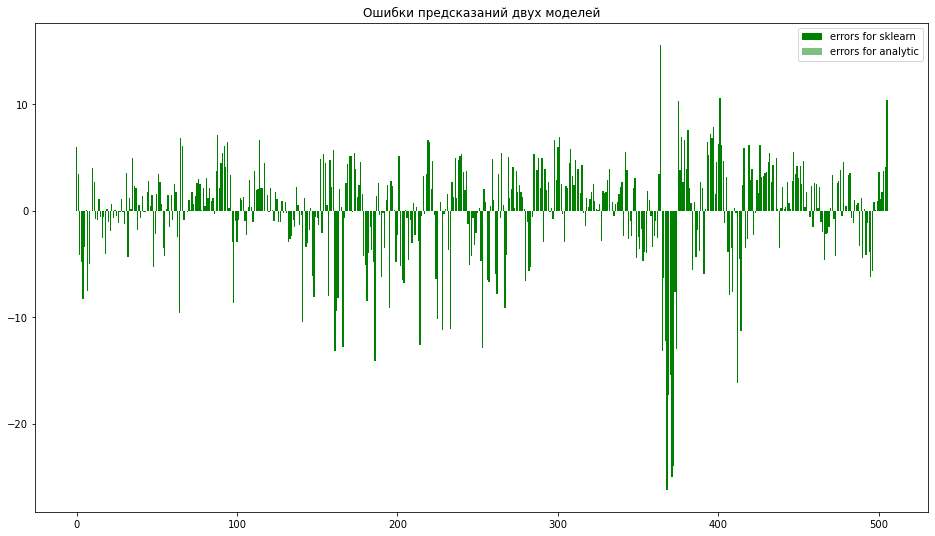

In [79]:
predict1 = reg.predict(features)
predict2 = x_new.dot(w_analytic)
er1 = predict1 - y
er2 = predict2 - y
x1 = range(er1.shape[0])
x2 = range(er2.shape[0])

fig, ax = plt.subplots(figsize=(16,9))
rects1 = ax.bar(x1, er1, color= 'green', label='errors for sklearn')
rects2 = ax.bar(x2, er2, color='green', alpha=.5, label='errors for analytic')
ax.set_title('Ошибки предсказаний двух моделей')
ax.legend()